# Introduction 

Logistic regression in ordinary form works for the classification with two classes. There are many other machine learning tools that can be used for the multiclass logistic regression. Here I use one vs all method over the logistic regression to indentify hand written digits. 

We start by importing all the packages that are needed here. 

In [1]:
import numpy as np
import pandas as pd 
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns; 
%matplotlib inline

# Parameters 

We define X and y. We also define initial theta, and regularization parameter lmbda. 

In [2]:
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
(m,n) = X.shape

k = 10                   # Number of distinct digits.
theta = np.zeros((k,n)) 
lmbda = 0.1

# Visualization of the data 

Here are few sample images of handwritten digits.

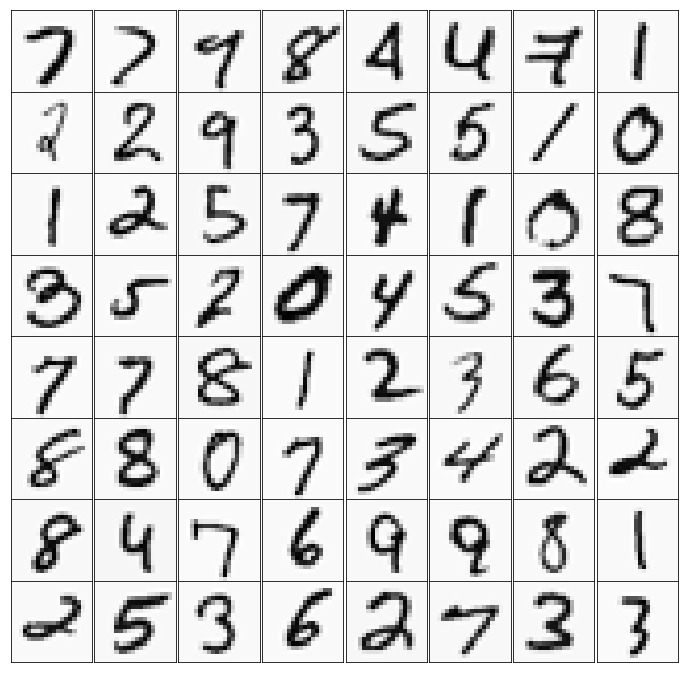

In [3]:
sq_grid = 8
fig, ax = plt.subplots(sq_grid, sq_grid, figsize = (12, 12))
for i in range(sq_grid):
    for j in range(sq_grid):
        rnd_img = np.random.randint(X.shape[0])
        ax[i,j].imshow(data['X'][rnd_img].reshape((20, 20), order = 'F'), cmap = 'Greys')
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        fig.subplots_adjust(wspace = 0, hspace = 0)

# Regularized cost function 

Sigmoid function: 
$$ g(z)=\frac{1}{1 + exp(-z)} $$

Hypothesis:
$$ h_{\theta}(x) = g(\theta^{T}x)$$

Cost function with regularization: 
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(X^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(X^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [4]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

def hypothesis(theta, X):
    z = np.dot(X, theta.transpose())
    return sigmoid(z)

def cost_function_reg(theta, X, y, lmbd):
    
    first_term = np.dot(y.transpose(), np.log(hypothesis(theta, X)))
    second_term = np.dot(1 - y.transpose(), np.log(1 - hypothesis(theta, X)))
    
    theta_p = np.delete(theta, 0)
    reg = lmbd/(2 * m) * np.dot(theta_p, theta_p)
    
    return - 1/m *  (first_term + second_term) + reg 

# Regularized gradient 

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (X^{(i)})-y^{(i)})X^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$

In [5]:
def gradient_reg(theta, X, y, lmbd):
    
    temp = hypothesis(theta, X) - y
    theta_p = np.delete(theta, 0)
    reg = lmbd/m * np.append(0, theta_p)
    
    return 1/m * np.dot(temp.transpose(), X)

# One vs all 

Here one vs all classifier has been implemented. 
I have used scipy's fmin_cg function to optimize the cost function using the regularized gradient. 

In [6]:
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = cost_function_reg, x0 = theta[i], 
                           fprime = gradient_reg, args = (X, (y == digit_class).flatten(), lmbda))

         Current function value: 0.011041
         Iterations: 34
         Function evaluations: 171
         Gradient evaluations: 159
         Current function value: 0.016792
         Iterations: 38
         Function evaluations: 189
         Gradient evaluations: 179
         Current function value: 0.052170
         Iterations: 86
         Function evaluations: 314
         Gradient evaluations: 304
         Current function value: 0.059586
         Iterations: 73
         Function evaluations: 315
         Gradient evaluations: 303
         Current function value: 0.035062
         Iterations: 71
         Function evaluations: 286
         Gradient evaluations: 274
         Current function value: 0.060439
         Iterations: 45
         Function evaluations: 179
         Gradient evaluations: 167
         Current function value: 0.021277
         Iterations: 43
         Function evaluations: 233
         Gradient evaluations: 221
         Current function value: 0.033402
      

# One vs all prediction 

This method gives the accuracy above 95%.

In [7]:
pred_without_0 = np.argmax(np.dot(X, theta.transpose()), axis = 1)
pred_with_0 = [i if i else 10 for i in pred_without_0]
print('Accuracy: {}%'.format(100 * np.mean(pred_with_0 == y.flatten())))

Accuracy: 95.44%


# Using Sklearn 

Scikit-learn has OneVsRestClassification which can be implemented with other classifier method. An example is here with the logistic regression. 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [9]:
clf = OneVsRestClassifier(LogisticRegression())

In [10]:
X = data['X']
y = data['y'].flatten()

clf.fit(X, y)

print("Accuracy: {}%".format(100 * clf.score(X, y)))

Accuracy: 94.38%


# More sklearn 

Scikit-learn has other direct classification for the multiclass classification method. Implementation of the various methods is exactly the same. You change the name of classifier in the code each time. 

In [11]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning) 
warnings.filterwarnings('ignore', category = UserWarning) 

In [12]:
# Importing 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Instanciating 

knn = KNeighborsClassifier()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [14]:
# Fitting 

knn.fit(X, y)
gnb.fit(X, y)
lda.fit(X, y)
tree.fit(X, y)
forest.fit(X, y)

# Predicting 

print("K-Nearest Neighbors: \t\t {}%".format(knn.score(X, y) * 100))
print("Gaussian Naive Bias: \t\t {}%".format(gnb.score(X, y) * 100))
print("Linear Discriminant Analysis: \t {}%".format(round(lda.score(X, y) * 100, 2)))
print("Decision Tree: \t\t\t {}%".format(tree.score(X, y) * 100))
print("Random Forest: \t\t\t {}%".format(forest.score(X, y) * 100))

K-Nearest Neighbors: 		 96.56%
Gaussian Naive Bias: 		 63.22%
Linear Discriminant Analysis: 	 90.26%
Decision Tree: 			 100.0%
Random Forest: 			 99.92%


We can see different methods have different accuracy socres. Two things to be mentioned: 
1. This does not imply one method is better than other in general. The method best for one data set can be out performed by other method in other dataset. 
2. This does not even imply one method is best for this data set. This is the accuracy of the training set. There might be issue of overfitting. So cross validation is needed. 

# Neural Network 

Fianlly neural network also can be implemented exactly the same way. 

In [15]:
from sklearn.neural_network import MLPClassifier

In [17]:
nn = MLPClassifier()
nn.fit(X, y)
print("Accuracy: {}%".format(100 * nn.score(X, y)))

Accuracy: 100.0%
